# Merging multiple csv files into one

In [1]:
import os
import pandas as pd

folder_path = "T1_data/"  # Current folder
output_file = "merged_output_T1.csv"

# Get list of all CSV files in the current folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Print found files (debugging)
print("CSV Files found:", csv_files)

# Check if any CSV files exist
if not csv_files:
    print("Error: No CSV files found in the current folder.")
    exit()

# Read the first CSV file as the base dataframe
df_merged = pd.read_csv('T1_data/'+csv_files[0])

# Merge all other CSVs on the 'Name' column
for file in csv_files[1:]:
    df = pd.read_csv('T1_data/'+file)
    df_merged = pd.merge(df_merged, df, on='Name', how='outer', suffixes=('', '_dup'))  # Prevent merge error

# Drop duplicate columns (columns ending in '_dup')
df_merged = df_merged.loc[:, ~df_merged.columns.str.endswith('_dup')]

# Save the merged dataframe to a new CSV
df_merged.to_csv(output_file, index=False)

print(f"Merged CSV saved as {output_file} in the current folder.")


CSV Files found: ['Balance_Sheet.csv', 'cash_flow_statments.csv', 'price.csv', 'ratios_2.csv', 'ratios_1.csv', 'Annual_P_L_1.csv', 'Annual_P_L_2.csv', 'Quarter_P_L_2.csv', 'Quarter_P_L_1.csv', 'other_metrics.csv']
Merged CSV saved as merged_output_T1.csv in the current folder.


In [2]:
import os
import pandas as pd

folder_path = "T2_data/"  # Current folder
output_file = "merged_output_T2.csv"

# Get list of all CSV files in the current folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Print found files (debugging)
print("CSV Files found:", csv_files)

# Check if any CSV files exist
if not csv_files:
    print("Error: No CSV files found in the current folder.")
    exit()

# Read the first CSV file as the base dataframe
df_merged = pd.read_csv('T2_data/'+csv_files[0])

# Merge all other CSVs on the 'Name' column
for file in csv_files[1:]:
    df = pd.read_csv('T2_data/'+file)
    df_merged = pd.merge(df_merged, df, on='Name', how='outer', suffixes=('', '_dup'))  # Prevent merge error

# Drop duplicate columns (columns ending in '_dup')
df_merged = df_merged.loc[:, ~df_merged.columns.str.endswith('_dup')]

# Save the merged dataframe to a new CSV
df_merged.to_csv(output_file, index=False)

print(f"Merged CSV saved as {output_file} in the current folder.")


CSV Files found: ['Balance_Sheet.csv', 'price.csv', 'cash_flow_statements.csv', 'ratios_2.csv', 'ratios_1.csv', 'Annual_P_L_1.csv', 'Annual_P_L_2.csv', 'Quarter_P_L_2.csv', 'Quarter_P_L_1.csv', 'other_metrics.csv']
Merged CSV saved as merged_output_T2.csv in the current folder.


# Data preprocessing

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(f'merged_output_T1.csv')
target_df = pd.read_csv(f'merged_output_T2.csv')

In [5]:
target_df = target_df.rename(columns={'Current Price': 'Target Price'})
merged_df = pd.merge(target_df[['Name','Target Price']], df, on='Name')

In [6]:
required_columns = [
    "RSI", "MACD", "Change in FII holding 3Years","Change in DII holding 3Years","Change in FII holding","Change in DII holding",
    "Market Capitalization","Market Capitalization 3years back","Market Capitalization 5years back","Market Capitalization 7years back","Market Capitalization 10years back" ,
    "Quick ratio", "Credit rating", "Working Capital Days", "Working capital 3Years back", "Working capital 5Years back",
    "Working capital 7Years back", "Working capital 10Years back",
    "EPS latest quarter", "NPM latest quarter", "YOY Quarterly sales growth",
    "YOY Quarterly profit growth", "Current ratio", "Interest Coverage Ratio",
    "Price to Sales",
    "Free cash flow 3years", "Free cash flow 5years", "Free cash flow 7years","Free cash flow 10years",
    "Operating cash flow 3years","Operating cash flow 5years","Operating cash flow 7years",
    "Industry PE", "Historical PE 3Years","Historical PE 5Years","Historical PE 7Years", "Industry PBV",
    "Return over 1year", "Return over 5years","Current Price","Target Price"
]

In [7]:
dataset = merged_df[required_columns]

dataset['Percentage Increase from Current Price'] = ((dataset['Target Price'] - dataset['Current Price']) / dataset['Current Price']) * 100


/var/folders/5m/7vbd025s3f90js49f4r472200000gn/T/ipykernel_182/3799997174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Percentage Increase from Current Price'] = ((dataset['Target Price'] - dataset['Current Price']) / dataset['Current Price']) * 100


In [8]:
dataset.head()

,RSI,MACD,Change in FII holding 3Years,Change in DII holding 3Years,Change in FII holding,Change in DII holding,Market Capitalization,Market Capitalization 3years back,Market Capitalization 5years back,Market Capitalization 7years back,...,Industry PE,Historical PE 3Years,Historical PE 5Years,Historical PE 7Years,Industry PBV,Return over 1year,Return over 5years,Current Price,Target Price,Percentage Increase from Current Price
0,69.23,12.82,0.70,0.00,0.01,0.00,795.54,124.03,134.79,123.50,...,19.15,8.41,8.23,8.38,3.52,134.11,41.55,225.45,287.75,27.633622
1,88.60,4.33,-0.35,-0.15,0.00,0.00,73.96,14.65,20.21,19.16,...,23.18,4.82,4.69,3.57,1.78,185.75,30.34,70.44,86.30,22.515616
2,78.12,36.69,38.31,6.97,0.74,-0.53,36254.08,10894.33,NaN,NaN,...,23.18,27.09,29.05,29.05,1.78,115.42,NaN,999.10,1056.30,5.725153
3,62.56,77.58,1.50,1.80,-0.41,0.71,1024.98,213.76,48.38,22.11,...,42.74,13.44,10.69,13.15,5.67,165.64,64.50,1194.20,1245.65,4.308324
4,NaN,0.33,NaN,NaN,NaN,NaN,26.55,NaN,NaN,NaN,...,34.11,1.51,1.51,1.51,3.70,NaN,NaN,44.10,39.30,-10.884354


In [9]:
dataset = dataset.fillna(0.0).astype('int64')

In [10]:

numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Normalize only eligible numeric data
# exclude last 3 columns
numeric_cols = numeric_cols[:-3]
dataset.drop(columns=['Current Price','Target Price'], axis=1, inplace=True)
scaler = MinMaxScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols].fillna(0))


In [11]:
dataset.head()

,RSI,MACD,Change in FII holding 3Years,Change in DII holding 3Years,Change in FII holding,Change in DII holding,Market Capitalization,Market Capitalization 3years back,Market Capitalization 5years back,Market Capitalization 7years back,...,Operating cash flow 5years,Operating cash flow 7years,Industry PE,Historical PE 3Years,Historical PE 5Years,Historical PE 7Years,Industry PBV,Return over 1year,Return over 5years,Percentage Increase from Current Price
0,0.69,0.060986,0.372549,0.514706,0.157895,0.678571,0.000376,0.000105,0.000160,0.000257,...,0.347200,0.396200,0.031250,0.002268,0.002268,0.000573,0.004243,0.013286,0.276042,27
1,0.88,0.059884,0.372549,0.514706,0.157895,0.678571,0.000035,0.000012,0.000024,0.000040,...,0.346867,0.395832,0.037829,0.001134,0.001134,0.000215,0.001414,0.016232,0.247396,22
2,0.78,0.064290,0.745098,0.602941,0.157895,0.678571,0.017141,0.009268,0.000000,0.000000,...,0.348460,0.396146,0.037829,0.007655,0.008222,0.002079,0.001414,0.012188,0.169271,5
3,0.62,0.069934,0.382353,0.529412,0.157895,0.678571,0.000484,0.000181,0.000057,0.000046,...,0.347125,0.396038,0.069079,0.003686,0.002835,0.000932,0.007072,0.015076,0.335938,4
4,0.00,0.059334,0.372549,0.514706,0.157895,0.678571,0.000012,0.000000,0.000000,0.000000,...,0.346878,0.395847,0.055921,0.000284,0.000284,0.000072,0.004243,0.005545,0.169271,-10


# Model buidling and analysis

In [12]:
features = dataset.drop(['Adjusted_Score', 'Rank', 'Percentage Increase from Current Price'], axis=1, errors='ignore')
target = dataset['Percentage Increase from Current Price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,RSI,MACD,Change in FII holding 3Years,Change in DII holding 3Years,Change in FII holding,Change in DII holding,Market Capitalization,Market Capitalization 3years back,Market Capitalization 5years back,Market Capitalization 7years back,...,Operating cash flow 3years,Operating cash flow 5years,Operating cash flow 7years,Industry PE,Historical PE 3Years,Historical PE 5Years,Historical PE 7Years,Industry PBV,Return over 1year,Return over 5years
4358,0.58,0.059334,0.372549,0.514706,0.157895,0.678571,0.000006,0.000000e+00,0.000004,0.000044,...,0.303600,0.346878,0.395847,0.037829,0.013893,0.013893,0.003513,0.001414,0.004968,0.182292
2002,0.37,0.059196,0.372549,0.514706,0.157895,0.678571,0.000002,8.506997e-07,0.000001,0.000002,...,0.303626,0.346878,0.395853,0.037829,0.003402,0.003402,0.000860,0.001414,0.005545,0.169271
1891,0.68,0.059334,0.372549,0.514706,0.157895,0.678571,0.000013,4.253498e-06,0.000006,0.000238,...,0.303598,0.346875,0.395844,0.037829,0.027219,0.027219,0.009964,0.001414,0.005545,0.265625
2765,0.72,0.059609,0.372549,0.514706,0.157895,0.678571,0.000012,5.104198e-06,0.000007,0.000021,...,0.303600,0.346877,0.395847,0.055921,0.032039,0.030904,0.007814,0.004243,0.008838,0.169271
4044,0.57,0.060435,0.352941,0.544118,0.157895,0.678571,0.677431,1.000000e+00,0.896699,1.000000,...,0.532281,0.601547,0.640467,0.049342,0.008506,0.008506,0.002007,0.009901,0.006585,0.197917


In [14]:
y_train.head()

4358    -6
2002    -1
1891   -17
2765    15
4044     8
Name: Percentage Increase from Current Price, dtype: int64

## Linear regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {lr_mse}")

Mean Squared Error: 417.18929790370237


In [18]:
weights = lr.coef_
bias = lr.intercept_

# Print results
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print("\nLinear Regression Results (trained on training set):")
print(f"Bias (Intercept): {bias:.4f}")
print("\nFeature Weights:")
for i, (feature, weight) in enumerate(zip(X_train.columns, weights), 1):
    print(f"{feature}: {weight:.4f}")

Training set size: 3690 samples
Test set size: 923 samples

Linear Regression Results (trained on training set):
Bias (Intercept): 24.9598

Feature Weights:
RSI: 1.4807
MACD: -83.1128
Change in FII holding 3Years: -11.3746
Change in DII holding 3Years: -4.1235
Change in FII holding: 18.1349
Change in DII holding: -26.1336
Market Capitalization: -94.6631
Market Capitalization 3years back: 78.8129
Market Capitalization 5years back: -35.7914
Market Capitalization 7years back: 9.8400
Market Capitalization 10years back: 9.1266
Quick ratio: 0.5457
Credit rating: 0.0000
Working Capital Days: 13.6534
Working capital 3Years back: -21.1038
Working capital 5Years back: 46.0934
Working capital 7Years back: -33.5558
Working capital 10Years back: -26.3167
EPS latest quarter: 24.0985
NPM latest quarter: 15.9668
YOY Quarterly sales growth: 27.9261
YOY Quarterly profit growth: 26.4141
Current ratio: -19.9172
Interest Coverage Ratio: 25.8721
Price to Sales: -29.3681
Free cash flow 3years: 69.7126
Free c

## 1 layer Neural network

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [20]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [21]:
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

In [22]:
# Define model parameters
input_dim = X_train.shape[1]
hidden_dim = 512

In [23]:
model = SimpleNN(input_dim, hidden_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [24]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [25]:
epochs = 20
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 604.6021
Epoch 2, Loss: 180.8408
Epoch 3, Loss: 74.3180
Epoch 4, Loss: 86.4242
Epoch 5, Loss: 289.7924
Epoch 6, Loss: 154.1071
Epoch 7, Loss: 422.0109
Epoch 8, Loss: 1180.7902
Epoch 9, Loss: 467.0627
Epoch 10, Loss: 835.4219
Epoch 11, Loss: 697.5530
Epoch 12, Loss: 188.1441
Epoch 13, Loss: 1856.0198
Epoch 14, Loss: 550.7836
Epoch 15, Loss: 403.7679
Epoch 16, Loss: 224.6451
Epoch 17, Loss: 1204.5717
Epoch 18, Loss: 141.6801
Epoch 19, Loss: 454.5443
Epoch 20, Loss: 216.4652


In [26]:

with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
y_pred_nn = y_pred_tensor.numpy().flatten()

print(mean_squared_error(y_test,y_pred_nn))

413.09852115170804


## Deep neural network

In [27]:
class DeepNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=4, dropout_rate=0.4):
        super(DeepNN, self).__init__()
        
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_dim))
        
        for _ in range(num_layers - 2):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
        
        self.layers.append(nn.Linear(hidden_dim, 1))
        self.relu = nn.GELU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.relu(layer(x))
            x = self.dropout(x)
        x = self.layers[-1](x)
        return x


In [28]:
deep_neural_network_models = []
for i in range(10,41,10):
    print(i)
    print("-"*20)
    model = DeepNN(input_dim, hidden_dim, num_layers=i)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    epochs = 20
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
    deep_neural_network_models.append(model)


10
--------------------
Epoch 1, Loss: 184.5312
Epoch 2, Loss: 128.2522
Epoch 3, Loss: 984.2609
Epoch 4, Loss: 1084.9714
Epoch 5, Loss: 129.0791
Epoch 6, Loss: 430.3652
Epoch 7, Loss: 1195.6345
Epoch 8, Loss: 77.5005
Epoch 9, Loss: 580.5734
Epoch 10, Loss: 505.3428
Epoch 11, Loss: 476.5440
Epoch 12, Loss: 246.8216
Epoch 13, Loss: 150.9868
Epoch 14, Loss: 1947.6859
Epoch 15, Loss: 175.4846
Epoch 16, Loss: 364.2599
Epoch 17, Loss: 201.8094
Epoch 18, Loss: 287.7675
Epoch 19, Loss: 279.8321
Epoch 20, Loss: 368.8427
20
--------------------
Epoch 1, Loss: 211.3488
Epoch 2, Loss: 772.1718
Epoch 3, Loss: 194.6933
Epoch 4, Loss: 161.1799
Epoch 5, Loss: 105.9928
Epoch 6, Loss: 1917.6194
Epoch 7, Loss: 885.8895
Epoch 8, Loss: 348.0303
Epoch 9, Loss: 455.8769
Epoch 10, Loss: 193.0916
Epoch 11, Loss: 109.2006
Epoch 12, Loss: 417.2533
Epoch 13, Loss: 80.5548
Epoch 14, Loss: 95.0873
Epoch 15, Loss: 81.7410
Epoch 16, Loss: 337.4073
Epoch 17, Loss: 239.8067
Epoch 18, Loss: 213.7881
Epoch 19, Loss: 180.

In [29]:
mse_values=[]
for model in deep_neural_network_models:
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
    y_pred_nn_deep = y_pred_tensor.numpy().flatten()
    mse_values.append(mean_squared_error(y_test,y_pred_nn_deep))


In [30]:
model_names_with_layers = [f'neural_network_with_{10+10*idx}_layers' for idx,model_name in enumerate(deep_neural_network_models)]

In [31]:
model_mse_df= pd.DataFrame()
model_mse_df['model'] = model_names_with_layers
model_mse_df['mse'] = mse_values

In [32]:
model_mse_df.loc[-1] = ["Linear Regression", lr_mse] 
model_mse_df = model_mse_df.sort_index().reset_index(drop=True)  

In [33]:
model_mse_df

,model,mse
0,Linear Regression,417.189298
1,neural_network_with_10_layers,414.592460
2,neural_network_with_20_layers,413.750438
3,neural_network_with_30_layers,413.054609
4,neural_network_with_40_layers,412.922768


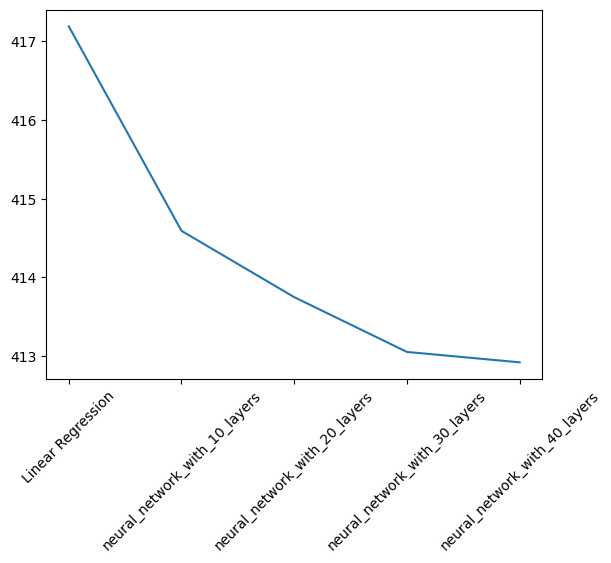

In [34]:
import matplotlib.pyplot as plt

plt.plot(model_mse_df['model'], model_mse_df['mse'])
plt.xticks(rotation=45)
plt.show()

### We will proceed with neural network with 40 layers for prediction

# Prediction

In [ ]:
test_df = pd.read_csv("merged_output_T2.csv")
required_columns.remove('Target Price')
required_columns.remove("Current Price")
test_df = test_df[required_columns]

test_df[numeric_cols] = scaler.transform(test_df[numeric_cols].fillna(0))

In [44]:
test_df.head()

,RSI,MACD,Change in FII holding 3Years,Change in DII holding 3Years,Change in FII holding,Change in DII holding,Market Capitalization,Market Capitalization 3years back,Market Capitalization 5years back,Market Capitalization 7years back,...,Operating cash flow 3years,Operating cash flow 5years,Operating cash flow 7years,Industry PE,Historical PE 3Years,Historical PE 5Years,Historical PE 7Years,Industry PBV,Return over 1year,Return over 5years
0,0.7415,0.061882,0.379902,0.515588,0.158553,0.679286,0.000480,0.000106,0.000161,0.000258,...,0.303877,0.347201,0.396201,0.037961,0.002384,0.002379,0.000601,0.005078,0.015217,0.310443
1,0.8038,0.060019,0.369118,0.512500,0.157895,0.678571,0.000043,0.000012,0.000024,0.000040,...,0.303633,0.346883,0.395844,0.038174,0.000493,0.000593,0.000250,0.002673,0.024086,0.283516
2,0.5970,0.066284,0.761275,0.622794,0.175526,0.683095,0.018123,0.009268,0.000000,0.000000,...,0.302036,0.348461,0.396146,0.038174,0.007681,0.008310,0.002101,0.002673,0.011784,0.169271
3,0.6547,0.064137,0.390294,0.542206,0.161974,0.679405,0.000505,0.000182,0.000058,0.000046,...,0.303758,0.347126,0.396039,0.078783,0.003887,0.003079,0.000943,0.010042,0.014462,0.351380
4,0.4513,0.059166,0.372549,0.514706,0.157895,0.678571,0.000011,0.000000,0.000000,0.000000,...,0.303606,0.346878,0.395847,0.060395,0.037465,0.037465,0.009472,0.005403,0.005545,0.169271


In [45]:
test_df.shape

(4695, 39)

In [55]:
test = torch.tensor(test_df.to_numpy(), dtype=torch.float32)

In [79]:
model = deep_neural_network_models[-1]
with torch.no_grad():
        y_pred_tensor = model(test)

In [82]:
y_pred_tensor

tensor([[5.2730],
        [5.4776],
        [5.4290],
        ...,
        [6.0498],
        [5.6034],
        [5.0353]])

In [89]:
result= pd.DataFrame()
result['company'] = pd.read_csv("merged_output_T2.csv")['Name']
result['current_price'] = pd.read_csv("merged_output_T2.csv")['Current Price']
result['predicted_change'] = y_pred_tensor

In [90]:
result.head()

,company,current_price,predicted_change
0,20 Microns,287.75,5.273030
1,21st Cent. Mgmt.,86.30,5.477614
2,360 ONE,1056.30,5.428997
3,3B Blackbio,1245.65,5.402200
4,3C IT Solutions,39.30,5.040149


In [91]:
result = result.sort_values(by='predicted_change', ascending=False)  


In [92]:
result.head()

,company,current_price,predicted_change
2081,Kakatiya Cement,233.99,6.932995
2005,Josts Engg. Co.,1025.75,6.910664
4402,VIP Clothing,44.60,6.882409
4638,Yaan Enterprises,79.05,6.804497
285,Anmol India,33.01,6.767756


In [96]:
result['final_price'] = result['current_price']*(1+result['predicted_change']/100)

In [97]:
result.head()

,company,current_price,predicted_change,final_price
2081,Kakatiya Cement,233.99,6.932995,250.212521
2005,Josts Engg. Co.,1025.75,6.910664,1096.636073
4402,VIP Clothing,44.60,6.882409,47.669553
4638,Yaan Enterprises,79.05,6.804497,84.428959
285,Anmol India,33.01,6.767756,35.244034


In [140]:
total_amount = 1000000

amount_to_invest_based_on_ml = total_amount * 0.5

sum_of_top_final_price = 0

no_of_companies = 10


In [ ]:
t1_df = pd.read_csv('merged_output_T1.csv')

for i in range(len(t1_df)):
    for j in range(len(df_top_10)):
        if t1_df['Name'][i] == df_top_10['company'][j]:
            df_top_10['current_price'][j] = t1_df['Current Price'][i]
            break

In [150]:
df_top10 = result.nlargest(no_of_companies, 'predicted_change').copy()

# Step 3: Allocate money based on predicted percentage growth
df_top10['allocation_weight'] = df_top10['predicted_change'] / df_top10['predicted_change'].sum()

# Step 4: Allocate money accordingly
df_top10['allocated_money'] = df_top10['allocation_weight'] * amount_to_invest_based_on_ml

# Step 5: Compute number of stocks to buy
df_top10['num_stocks'] = (df_top10['allocated_money'] // df_top10['current_price']).astype(int)

In [151]:
df_top10

,company,current_price,predicted_change,final_price,allocation_weight,allocated_money,num_stocks
2081,Kakatiya Cement,233.99,6.932995,250.212521,0.102111,51055.691406,218
2005,Josts Engg. Co.,1025.75,6.910664,1096.636073,0.101782,50891.242188,49
4402,VIP Clothing,44.60,6.882409,47.669553,0.101366,50683.171875,1136
4638,Yaan Enterprises,79.05,6.804497,84.428959,0.100219,50109.414062,633
285,Anmol India,33.01,6.767756,35.244034,0.099678,49838.843750,1509
3009,Pennar Industrie,186.06,6.743351,198.606673,0.099318,49659.125000,266
4586,Wanbury,214.93,6.741575,229.419659,0.099292,49646.050781,230
2534,Megatherm,353.05,6.712819,376.749604,0.098869,49434.281250,140
1072,Duncan Engg.,621.50,6.712026,663.215275,0.098857,49428.445312,79
2492,Marvel Decor,103.00,6.688308,109.888958,0.098508,49253.777344,478
